<h1 align='center'>Bank Marketing Dataset</h1>

Nama       : Rizky Mardhatillah

Student ID : PYTN-KS019-022


The data is related with direct marketing campaigns of a Portuguese banking institution The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or ('no') subscribed.

Input variables :
1. Age (numeric)
2. job : type of job (categorical: 'admin', 'blue-collar', 'entrepreneur', 'student', 'technician', 'unemployed', 'unknown')
3. marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'illiterate', 'professional.course', 'university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

 **related with the last contact of the current campaign:**
 
8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**social and economic context attributes**

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes', 'no')

### Impor pustaka-pustaka dasar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Impor fungsi-fungsi dari scikit-learn (sklearn)
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import make_scorer, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Read CSV 

In [3]:
df = pd.read_csv('bank+marketing/bank-additional/bank-additional-full.csv', delimiter=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Mengubah Nama kolom 'y' menjadi 'deposit'

In [5]:
df = df.rename(columns={'y': 'deposit'})

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [8]:
# memeriksa apakah DataFrame mengandung setidaknya satu nilai null di dalamnya
df.isnull().values.any()

False

## Data Cleaning

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [10]:
df.duplicated().sum()

12

In [11]:
# Mengapus data duplikat
df.drop_duplicates(keep='first', inplace=True)

In [12]:
df.duplicated().sum()

0

### Mencari Korelasi

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [14]:
# Memilih kolom numerik saja
numeric_cols = df.select_dtypes(include='number')

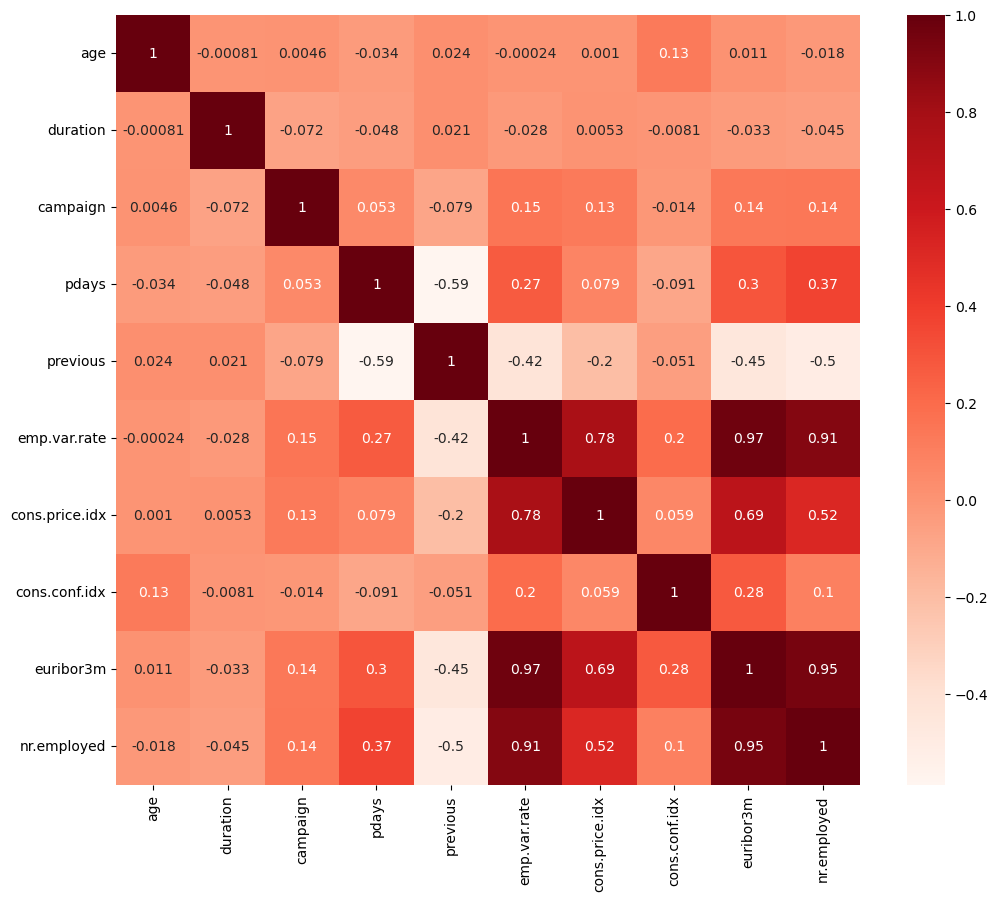

In [15]:
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module

fig = plt.figure(figsize=(12, 10))

sns.heatmap(numeric_cols.corr(), cmap='Reds', annot=True)
plt.show()  # Show the plot

In [16]:
numeric_cols.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


- **Korelasi Positif :**
Ketika korelasi antara dua variabel mendekati +1, ini menunjukkan hubungan positif. Ini berarti jika nilai salah satu variabel meningkat, kemungkinan besar nilai variabel lain juga akan meningkat.

- **Korelasi Negatif :**
Sebaliknya, jika korelasi mendekati -1, ini menunjukkan hubungan negatif bahwa ketika satu variabel meningkat, variabel lainnya cenderung menurun, dan sebaliknya. 

Korelasi Dekat dengan 0: Jika korelasi mendekati 0, maka tidak ada hubungan linier yang kuat antara kedua variabel tersebut.

## Visualisasi Jumlah client yang memutuskan untuk deposit

In [17]:
deposit_counts = df['deposit'].value_counts()

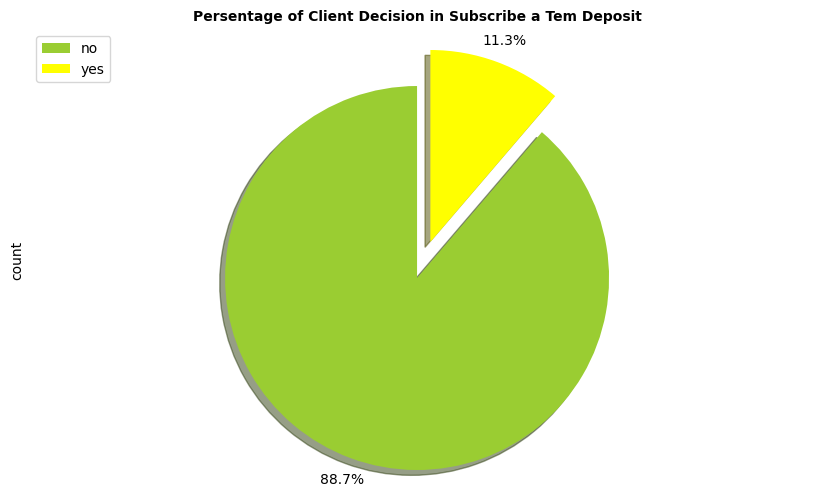

In [18]:
# Ploting untuk Pie Chart dan mengatur warna, ukuran, tampilan, shadow dll
color_list = ['yellowgreen', 'yellow']
explode_list = [0.1, 0.1]
font = {'weight' : 'bold', 'size': 10}
deposit_counts.plot(kind='pie',
                                 figsize=(10,6),
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 shadow=True,
                                 labels=None,
                                 pctdistance=1.12,
                                 colors=color_list,
                                 explode=explode_list
                                )
plt.title('Persentage of Client Decision in Subscribe a Tem Deposit', fontdict=font)
plt.axis('equal')
plt.legend(labels=deposit_counts.index, loc='upper left')
plt.show()

In [19]:
real_counts = deposit_counts.sort_values()
real_counts

deposit
yes     4639
no     36537
Name: count, dtype: int64

In [20]:
deposit_counts.sum()

41176

Berdasarkkan data diatas, dari data diatas kita dapat mengetahui informasi bahwa dari 41176, 4639 atau 11.3% yang melakukan deposit.

## Umur client yang memutuskan untuk deposit

In [21]:
deposit_data = df[df['deposit'] == 'yes']

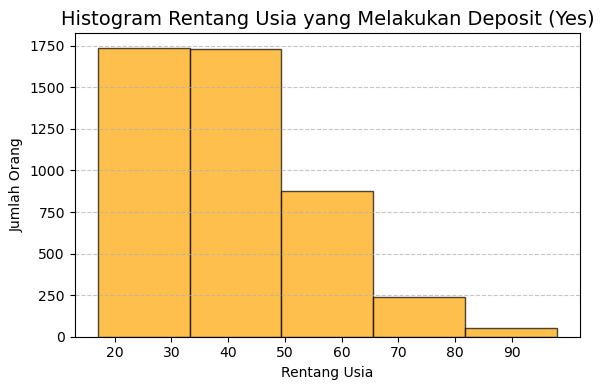

In [22]:

# Membuat histogram untuk rentang usia
plt.figure(figsize=(6, 4))
plt.hist(deposit_data['age'], bins=5, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah Orang')
plt.title('Histogram Rentang Usia yang Melakukan Deposit (Yes)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(20, 100, 10))
plt.tight_layout()

plt.show()

## Jumlah Pekerjaan yang banyak melakukan deposit

In [23]:
# Filter data untuk hanya mendapatkan yang melakukan pinjaman ('yes')
loan_data = df[df['loan'] == 'yes']

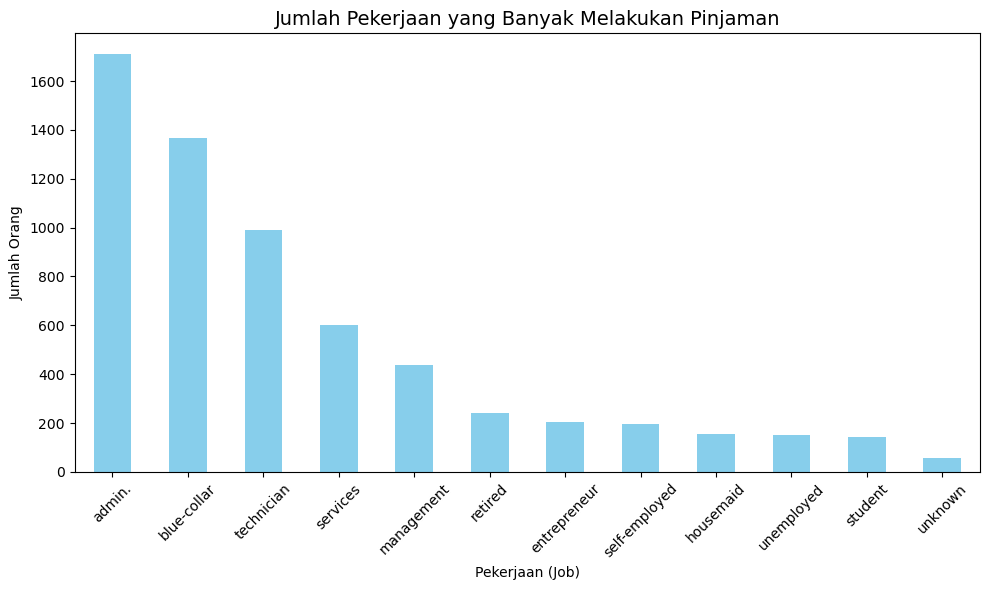

In [24]:

# Menghitung jumlah pekerjaan yang banyak melakukan pinjaman
job_counts = loan_data['job'].value_counts()

# Membuat bar chart untuk jumlah pekerjaan yang banyak melakukan pinjaman
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Pekerjaan (Job)')
plt.ylabel('Jumlah Orang')
plt.title('Jumlah Pekerjaan yang Banyak Melakukan Pinjaman', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Data Preprocessing

In [25]:
# Mengelompokkan kolom berdasarkan tipe data
numerical = ['age', 'duration','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
boolean = ['deposit']

In [26]:
# Menggunakan .ravel() untuk mengonversi ke bentuk yang sesuai
boolean = np.array(boolean).ravel()

In [27]:
le = preprocessing.LabelEncoder()

# Mengubah data kategori ke data numerik pada DataFrame df
for col in categorical:
    df[col] = le.fit_transform(df[col])

# Mengubah data boolean ke data numerik pada DataFrame df
for col in boolean:
    df[col] = le.fit_transform(df[col])

In [28]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Logistic Regression

### Melakukan Spliting Data Training set

In [29]:
X = df[features]
y = df[boolean]
split_test_size = 0.30

In [30]:
y = y.values

In [31]:
y = y.ravel()

In [32]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=split_test_size, random_state=42)

In [34]:
print("{0:0.2f}% ada pada training set". format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% ada pada test set". format((len(X_test)/len(df.index)) * 100))

70.00% ada pada training set
30.00% ada pada test set


In [35]:
Model = LogisticRegression(solver='liblinear', random_state=0)

### Training dan Evaluasi Model

In [36]:
# Latih model pada data pelatihan
Model.fit(X_train, y_train)

# Lakukan prediksi pada data pengujian
y_pred = Model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy:  0.907309965190642
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     10929
           1       0.67      0.39      0.49      1424

    accuracy                           0.91     12353
   macro avg       0.80      0.68      0.72     12353
weighted avg       0.90      0.91      0.90     12353



- Akurasi (Accuracy): Akurasi model sekitar 0.906, atau 90.6%. Akurasi ini cukup baik jika sebagian besar data dalam kelas 0. Namun, akurasi bisa menyesatkan jika distribusi kelas tidak seimbang, seperti yang terlihat dalam hasil . Jika data memiliki ketidakseimbangan yang signifikan antara kelas, maka akurasi mungkin bukan ukuran yang baik untuk mengukur kinerja.

- Presisi (Precision): Untuk kelas 0, presisi cukup tinggi, yaitu sekitar 0.92, yang berarti sekitar 92% dari prediksi positif untuk kelas 0 adalah benar. Namun, untuk kelas 1, presisi rendah, yaitu sekitar 0.66, yang berarti hanya sekitar 66% dari prediksi positif untuk kelas 1 adalah benar. Ini menunjukkan bahwa model Anda cenderung lebih akurat dalam memprediksi kelas 0 daripada kelas 1.

- Recall (Sensitivitas): Recall untuk kelas 0 sangat tinggi, yaitu sekitar 0.97, yang berarti model sangat baik dalam mendeteksi sebagian besar instance kelas 0 yang sebenarnya positif. Namun, recall untuk kelas 1 sangat rendah, yaitu sekitar 0.39, yang menunjukkan bahwa model tidak dapat mendeteksi sebagian besar instance kelas 1 yang sebenarnya positif.

- F1-Score: F1-score adalah perpaduan antara presisi dan recall. Untuk kelas 0, f1-score cukup tinggi (0.95), sedangkan untuk kelas 1, f1-score rendah (0.49).

- Dukungan (Support): Dukungan adalah jumlah instance dalam setiap kelas dalam data pengujian. Ini dapat membantu Anda memahami seberapa besar sampel yang Anda miliki untuk masing-masing kelas.

- Rata-rata (Macro dan Weighted Average): Statistik agregat seperti rata-rata makro dan rata-rata tertimbang memberikan gambaran keseluruhan tentang kinerja model di semua kelas. Jika rata-rata makro lebih rendah daripada rata-rata tertimbang, itu menunjukkan ketidakseimbangan kelas.

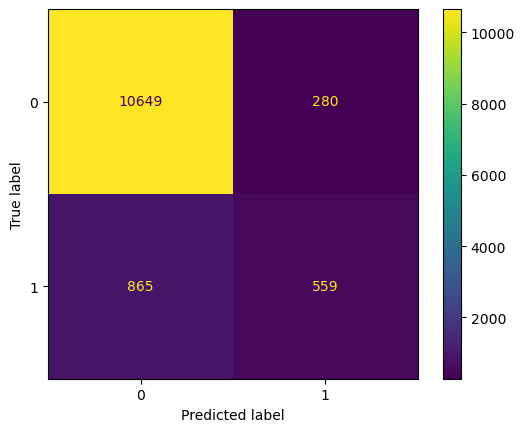

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = Model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()
plt.show()

Dalam gambar confusion matrix di atas didapatkan bahwa:

- True Positives (TP): Ada 559 sampel yang benar-benar positif (kelas 1) dan juga diprediksi positif oleh model.
- True Negatives (TN): Ada 10,649 sampel yang benar-benar negatif (kelas 0) dan juga diprediksi negatif oleh model.
- False Positives (FP): Ada 280 sampel yang sebenarnya negatif tetapi diprediksi sebagai positif oleh model (kesalahan tipe I).
- False Negatives (FN): Ada 865 sampel yang sebenarnya positif tetapi diprediksi sebagai negatif oleh model (kesalahan tipe II).

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [39]:
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.30445038152276643


Nilai RMSE yaitu 0.30445038152276643, menunjukkan bahwa model memiliki error rata-rata sekitar 0.306 pada prediksi regresi. Ini adalah nilai yang relatif kecil, yang menunjukkan bahwa model dapat melakukan prediksi dengan cukup baik. Dalam konteks regresi, semakin kecil RMSE, semakin baik kualitas model.



## K-Nearest Neighbor

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)

In [41]:
X = df[features].values
y = df[boolean].values
split_test_size = 0.20

In [42]:
# mengubah bentuk target y dari DataFrame atau array 2D menjadi array 1D.
y = y.ravel()

### Splitting Data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=split_test_size, random_state=42)

## Training dan Evaluasi Model

In [44]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [45]:
y_pred = model.predict(X_test)

In [46]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy:  0.9054152501214182
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7265
           1       0.63      0.49      0.55       971

    accuracy                           0.91      8236
   macro avg       0.78      0.73      0.75      8236
weighted avg       0.90      0.91      0.90      8236



**Akurasi (Accuracy)**: Akurasi model KNN Anda adalah sekitar 90.54%. Ini mengindikasikan bahwa sebagian besar prediksi yang dilakukan oleh model benar, dan sekitar 90.54% dari semua prediksi adalah benar.

**Precision**: Untuk kelas 0, precision adalah sekitar 93%. Ini berarti sekitar 93% dari prediksi yang diklasifikasikan sebagai kelas 0 adalah benar, sementara sisanya adalah false positive. Untuk kelas 1, precision adalah sekitar 63%. Ini berarti sekitar 63% dari prediksi yang diklasifikasikan sebagai kelas 1 adalah benar, sementara sisanya adalah false positive.

**Recall (Sensitivity**): Untuk kelas 0, recall adalah sekitar 96%. Ini berarti sekitar 96% dari contoh yang sebenarnya termasuk dalam kelas 0 berhasil ditemukan oleh model. Namun, untuk kelas 1, recall adalah sekitar 49%, yang berarti sekitar 49% dari contoh yang sebenarnya termasuk dalam kelas 1 berhasil ditemukan oleh model.

**F1-Score**: F1-score adalah rata-rata harmonik dari precision dan recall untuk masing-masing kelas. Untuk kelas 0, F1-score adalah sekitar 95%, dan untuk kelas 1, F1-score adalah sekitar 55%.

**Support**: Jumlah contoh dalam masing-masing kelas adalah 7265 untuk kelas 0 dan 971 untuk kelas 1.



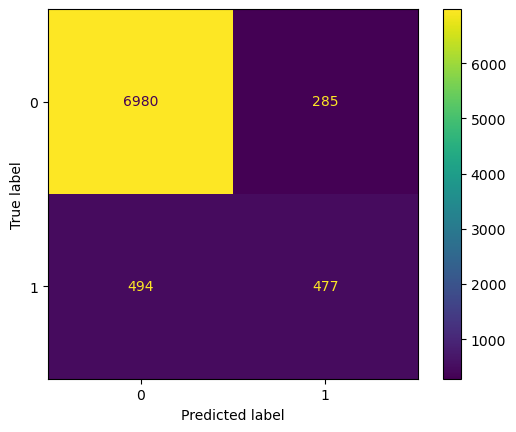

In [47]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()
plt.show()

**True Positive (TP)**: Jumlah 477. Ini berarti ada 477 kasus di mana model KNN dengan benar memprediksi bahwa seorang klien akan melakukan deposito, dan prediksi ini benar.

**True Negative (TN)**: Jumlah 6980. Ini berarti ada 6980 kasus di mana model KNN dengan benar memprediksi bahwa seorang klien tidak akan melakukan deposito, dan prediksi ini benar.

**False Positive (FP)**: Jumlah 285. Ini berarti ada 285 kasus di mana model KNN secara keliru memprediksi bahwa seorang klien akan melakukan deposito, padahal klien sebenarnya tidak melakukannya (kesalahan jenis I).

**False Negative (FN)**: Jumlah 494. Ini berarti ada 494 kasus di mana model KNN secara keliru memprediksi bahwa seorang klien tidak akan melakukan deposito, padahal klien sebenarnya melakukan deposito (kesalahan jenis II).



In [48]:
error = []

In [49]:
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error mean')

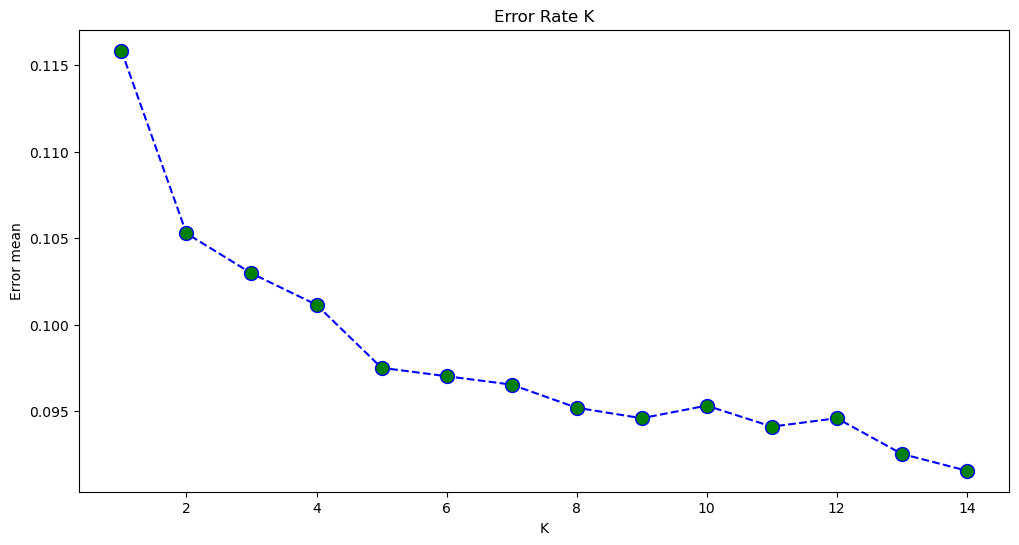

In [50]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

## SVM (Support Vector Machine)

In [51]:
X = df[features].values
y = df[boolean].values
split_test_size = 0.20

In [52]:
# mengubah bentuk target y dari DataFrame atau array 2D menjadi array 1D.
y = y.ravel()

### Splittiing Data

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=split_test_size, random_state=100)

In [54]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [55]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy:  0.9011656143759106
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7321
           1       0.57      0.43      0.49       915

    accuracy                           0.90      8236
   macro avg       0.75      0.69      0.72      8236
weighted avg       0.89      0.90      0.89      8236



Akurasi (Accuracy): Model memiliki akurasi sekitar 0.901, yang berarti sekitar 90.1% prediksi yang benar.

1. Precision: Untuk kelas 0 (label 0), precision adalah sekitar 93%, yang berarti sekitar 93% prediksi positif untuk kelas 0 adalah benar. Sedangkan untuk kelas 1 (label 1), precision adalah sekitar 57%, yang berarti sekitar 57% prediksi positif untuk kelas 1 adalah benar.

2. Recall: Untuk kelas 0, recall adalah sekitar 96%, yang berarti model berhasil mengidentifikasi sekitar 96% dari seluruh kasus aktual kelas 0. Sedangkan untuk kelas 1, recall adalah sekitar 43%, yang berarti model hanya dapat mengidentifikasi sekitar 43% dari seluruh kasus aktual kelas 1.

3. F1-Score: Untuk kelas 0, F1-score adalah sekitar 0.95, yang merupakan rata-rata harmonik dari precision dan recall. Sedangkan untuk kelas 1, F1-score adalah sekitar 0.49.

4. Support: Jumlah kasus aktual dalam dataset untuk kelas 0 adalah 7,321, sementara untuk kelas 1 adalah 915.

Ringkasan ini memberikan gambaran tentang kinerja model klasifikasi, khususnya dalam hal kemampuan model mengidentifikasi kasus positif (recall) dan sejauh mana prediksi positif model adalah benar (precision). Meskipun akurasi model cukup tinggi, recall untuk kelas 1 tampak lebih rendah, yang berarti ada ruang untuk perbaikan dalam hal kemampuan model mengidentifikasi kasus positif untuk kelas 1.

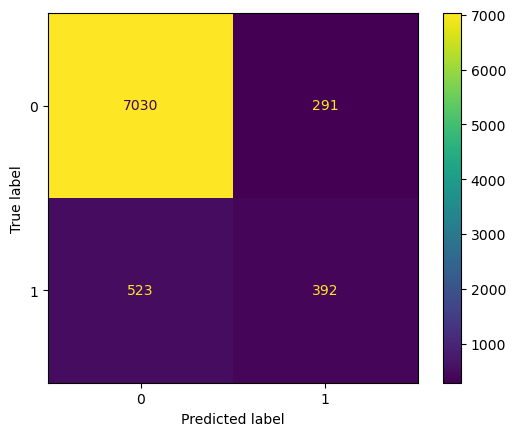

In [56]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()
plt.show()

- True Positives (TP): 392
- True Negatives (TN): 7030
- False Positives (FP): 291
- False Negatives (FN): 523

## Decision Tree

### Pengenalan Feature dan Target Variabel

In [57]:
X = df[features].values
y = df[boolean].values
split_test_size = 0.20

In [58]:
# mengubah bentuk target y dari DataFrame atau array 2D menjadi array 1D.
y = y.ravel()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=split_test_size, random_state=100)

In [60]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier(criterion='entropy')
Dtc = Dtc.fit(X_train, y_train)
y_pred = Dtc.predict(X_test)

In [61]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy:  0.8955803788246721
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7321
           1       0.53      0.54      0.54       915

    accuracy                           0.90      8236
   macro avg       0.74      0.74      0.74      8236
weighted avg       0.90      0.90      0.90      8236



kurasi (Accuracy): Model memiliki akurasi sekitar 0.894, yang berarti sekitar 89.4% prediksi yang benar.

1. Precision: Untuk kelas 0 (label 0), precision adalah sekitar 94%, yang berarti sekitar 94% prediksi positif untuk kelas 0 adalah benar. Sedangkan untuk kelas 1 (label 1), precision adalah sekitar 52%, yang berarti sekitar 52% prediksi positif untuk kelas 1 adalah benar.

2. Recall: Untuk kelas 0, recall adalah sekitar 94%, yang berarti model berhasil mengidentifikasi sekitar 94% dari seluruh kasus aktual kelas 0. Sedangkan untuk kelas 1, recall adalah sekitar 54%, yang berarti model dapat mengidentifikasi sekitar 54% dari seluruh kasus aktual kelas 1.

3. F1-Score: Untuk kelas 0, F1-score adalah sekitar 0.94, yang merupakan rata-rata harmonik dari precision dan recall. Sedangkan untuk kelas 1, F1-score adalah sekitar 0.53.

4. Support: Jumlah kasus aktual dalam dataset untuk kelas 0 adalah 7,321, sementara untuk kelas 1 adalah 915.

Ringkasan ini memberikan gambaran tentang kinerja model klasifikasi. Meskipun akurasi model cukup baik, terdapat perbedaan yang cukup besar antara precision dan recall untuk kelas 1, yang menunjukkan bahwa model mungkin lebih baik dalam mengidentifikasi kasus negatif (kelas 0) daripada kasus positif (kelas 1).

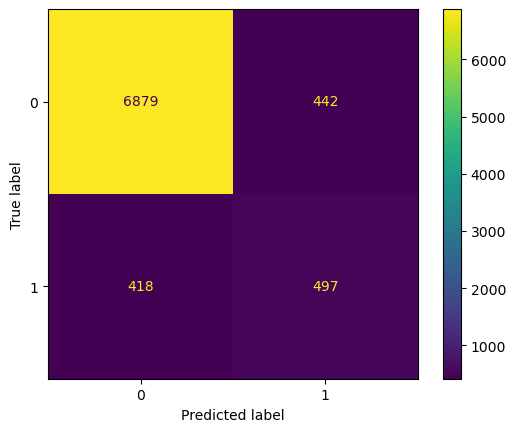

In [62]:
predictions = Dtc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()
plt.show()

- True Positives (TP): 495
- True Negatives (TN): 6871
- False Positives (FP): 450
- False Negatives (FN): 420


## Optimizing Decision Tree Performance

In [63]:
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier(criterion='entropy', max_depth= 5)
Dtc = Dtc.fit(X_train, y_train)
y_pred = Dtc.predict(X_test)

In [64]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy:  0.9173142302088393
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      7321
           1       0.65      0.55      0.60       915

    accuracy                           0.92      8236
   macro avg       0.80      0.76      0.78      8236
weighted avg       0.91      0.92      0.91      8236



Akurasi (Accuracy): Model memiliki akurasi sekitar 0.917, yang berarti sekitar 91.7% prediksi yang benar.

1. Precision: Untuk kelas 0 (label 0), precision adalah sekitar 95%, yang berarti sekitar 95% prediksi positif untuk kelas 0 adalah benar. Sedangkan untuk kelas 1 (label 1), precision adalah sekitar 65%, yang berarti sekitar 65% prediksi positif untuk kelas 1 adalah benar.

2. Recall: Untuk kelas 0, recall adalah sekitar 96%, yang berarti model berhasil mengidentifikasi sekitar 96% dari seluruh kasus aktual kelas 0. Sedangkan untuk kelas 1, recall adalah sekitar 55%, yang berarti model dapat mengidentifikasi sekitar 55% dari seluruh kasus aktual kelas 1.

3. F1-Score: Untuk kelas 0, F1-score adalah sekitar 0.95, yang merupakan rata-rata harmonik dari precision dan recall. Sedangkan untuk kelas 1, F1-score adalah sekitar 0.60.

4. Support: Jumlah kasus aktual dalam dataset untuk kelas 0 adalah 7,321, sementara untuk kelas 1 adalah 915.

Ringkasan ini memberikan gambaran tentang kinerja model klasifikasi. Model ini memiliki akurasi yang baik, namun masih terdapat perbedaan yang cukup signifikan antara precision dan recall untuk kelas 1, yang menunjukkan bahwa model mungkin lebih baik dalam mengidentifikasi kasus negatif (kelas 0) daripada kasus positif (kelas 1). Ini dapat menjadi titik fokus untuk perbaikan model jika diperlukan.

## Visualizing Decision Tree Classifier

In [65]:
class_name = df['deposit'].unique().astype(str)

In [66]:
class_name

array(['0', '1'], dtype='<U21')

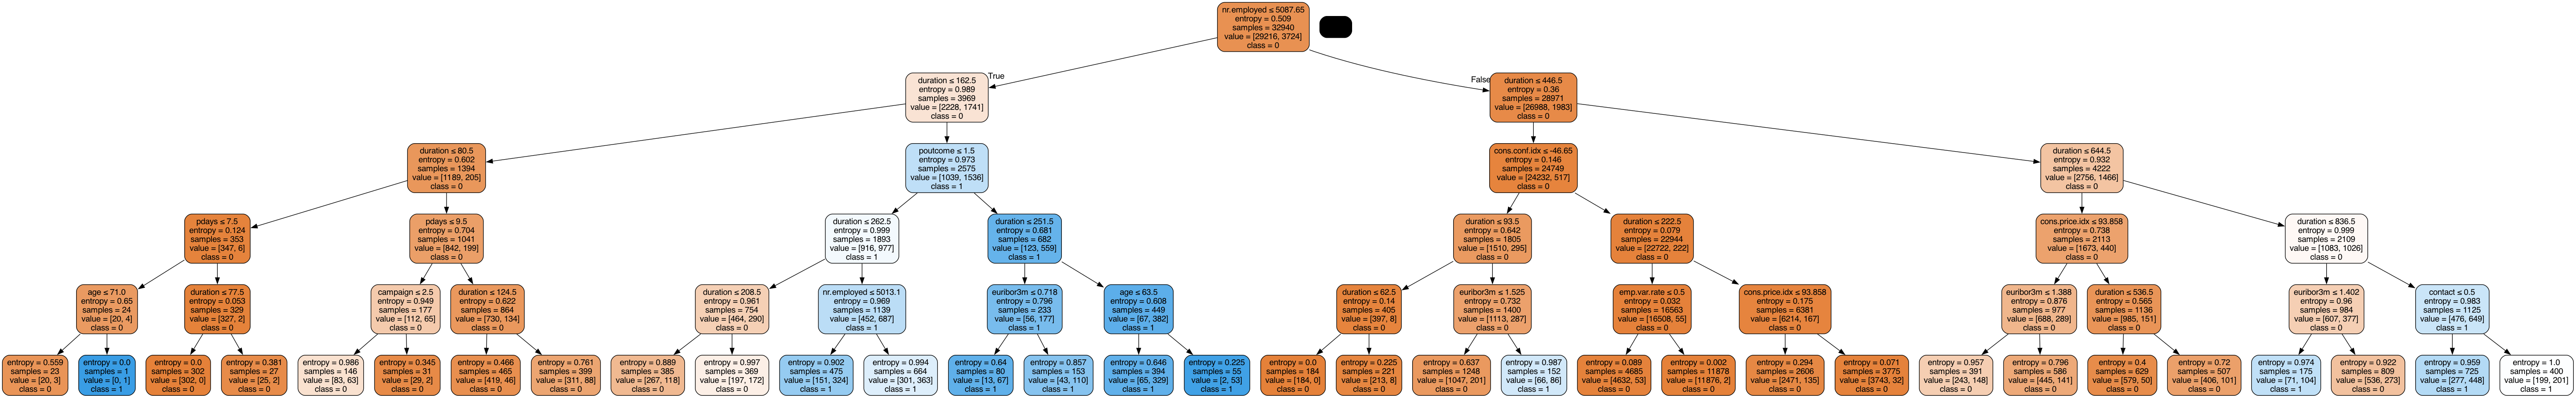

In [67]:
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(Dtc, out_file=dot_data, 
 class_names=class_name, # the target names.
 feature_names=features, # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

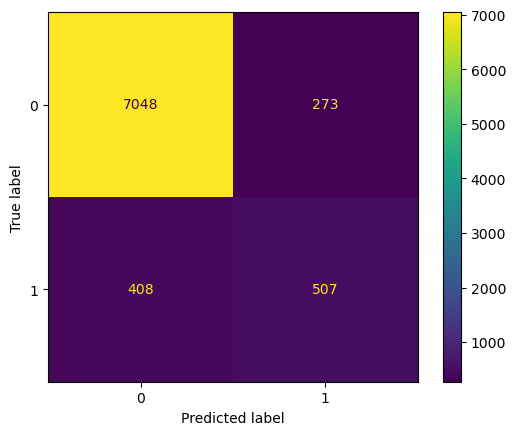

In [68]:
predictions = Dtc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()
plt.show()

- True Positives (TP): 507
- True Negatives (TN): 7049
- False Positives (FP): 272
- False Negatives (FN): 408

## Menerapkan Threshold, agar false negatif dapat diminimalisir

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Probabilitas kelas positif dari model (misalnya, dari predict_proba)
y_pred_prob = Dtc.predict_proba(X_test)[:, 1]

# Daftar threshold yang akan dicoba
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_threshold = 0
best_f1 = 0

for threshold in thresholds:
    # Konversi probabilitas ke prediksi biner menggunakan threshold
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)

    # Hitung metrik F1-score
    f1 = f1_score(y_test, y_pred_threshold)

    # Simpan threshold terbaik yang memberikan F1-score tertinggi
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Threshold Terbaik:", best_threshold)


Threshold Terbaik: 0.3


In [70]:
# Probabilitas kelas positif dari model
y_pred_prob = Dtc.predict_proba(X_test)[:, 1]

# Menerapkan threshold
threshold = 0.3
y_pred_threshold = (y_pred_prob >= threshold).astype(int)

# y_pred_threshold sekarang berisi prediksi berdasarkan threshold 0.3


In [71]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
classification_rep = classification_report(y_test, y_pred_threshold)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy:  0.9032297231665857
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      7321
           1       0.55      0.77      0.64       915

    accuracy                           0.90      8236
   macro avg       0.76      0.85      0.79      8236
weighted avg       0.92      0.90      0.91      8236



- **Akurasi (Accuracy)**: Model memiliki akurasi sekitar 0.903, yang berarti sekitar 90.3% prediksi yang benar.

- **Precision**: Untuk kelas 0 (label 0), precision adalah sekitar 97%, yang berarti sekitar 97% prediksi positif untuk kelas 0 adalah benar. Sedangkan untuk kelas 1 (label 1), precision adalah sekitar 55%, yang berarti sekitar 55% prediksi positif untuk kelas 1 adalah benar.

- **Recall**: Untuk kelas 0, recall adalah sekitar 92%, yang berarti model berhasil mengidentifikasi sekitar 92% dari seluruh kasus aktual kelas 0. Sedangkan untuk kelas 1, recall adalah sekitar 77%, yang berarti model dapat mengidentifikasi sekitar 77% dari seluruh kasus aktual kelas 1.

- **F1-Score**: Untuk kelas 0, F1-score adalah sekitar 0.94, yang merupakan rata-rata harmonik dari precision dan recall. Sedangkan untuk kelas 1, F1-score adalah sekitar 0.64.

- **Support**: Jumlah kasus aktual dalam dataset untuk kelas 0 adalah 7,321, sementara untuk kelas 1 adalah 915.

Ini memberikan gambaran tentang kinerja model klasifikasi. Model ini memiliki akurasi yang baik, tetapi terdapat perbedaan yang cukup besar antara precision dan recall untuk kelas 1, menunjukkan bahwa model mungkin lebih baik dalam mengidentifikasi kasus positif (recall tinggi) daripada kasus positif yang salah terklasifikasikan sebagai negatif (precision rendah). Ini bisa menjadi poin fokus untuk perbaikan model jika diperlukan.


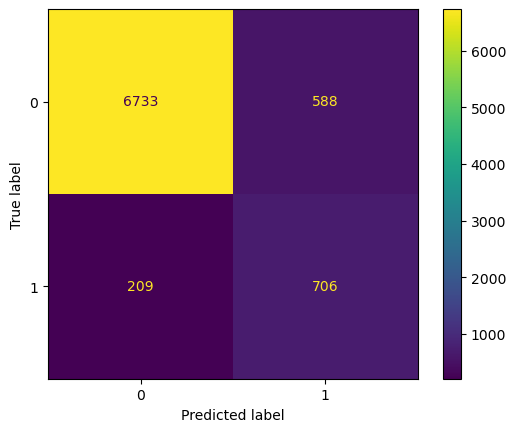

In [72]:
predictions = y_pred_threshold
cm = confusion_matrix(y_test, predictions, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()
plt.show()

# Random Forrest Classifier

In [73]:
X = df[features]
y = df[boolean]
split_test_size = 0.30

In [74]:
y = y.values

In [75]:
# mengubah bentuk target y dari DataFrame atau array 2D menjadi array 1D.
y = y.ravel()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=split_test_size, random_state=100)

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [78]:
rfc = rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy:  0.9179146765967781
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     10971
           1       0.67      0.53      0.59      1382

    accuracy                           0.92     12353
   macro avg       0.81      0.75      0.77     12353
weighted avg       0.91      0.92      0.91     12353



Akurasi (Accuracy): Model memiliki akurasi sekitar 0.915, yang berarti sekitar 91.5% prediksi yang benar.

1. Precision: Untuk kelas 0 (label 0), precision adalah sekitar 94%, yang berarti sekitar 94% prediksi positif untuk kelas 0 adalah benar. Sedangkan untuk kelas 1 (label 1), precision adalah sekitar 65%, yang berarti sekitar 65% prediksi positif untuk kelas 1 adalah benar.

2. Recall: Untuk kelas 0, recall adalah sekitar 97%, yang berarti model berhasil mengidentifikasi sekitar 97% dari seluruh kasus aktual kelas 0. Sedangkan untuk kelas 1, recall adalah sekitar 52%, yang berarti model hanya dapat mengidentifikasi sekitar 52% dari seluruh kasus aktual kelas 1.

3. F1-Score: Untuk kelas 0, F1-score adalah sekitar 0.95, yang merupakan rata-rata harmonik dari precision dan recall. Sedangkan untuk kelas 1, F1-score adalah sekitar 0.58.

4. Support: Jumlah kasus aktual dalam dataset untuk kelas 0 adalah 10,971, sementara untuk kelas 1 adalah 1,382.

Ringkasan ini memberikan gambaran tentang kinerja model klasifikasi, khususnya dalam hal kemampuan model mengidentifikasi kasus positif (recall) dan sejauh mana prediksi positif model adalah benar (precision). Model memiliki akurasi yang cukup baik, tetapi ada ruang untuk perbaikan dalam hal recall untuk kelas 1.

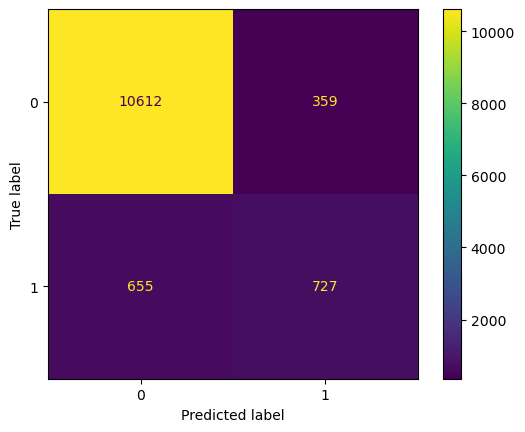

In [80]:
predictions = y_pred
cm = confusion_matrix(y_test, predictions, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()
plt.show()

Dalam confusion matrix di atas, terdapat :
- 10,593 prediksi benar negatif (True Negatives)
- 712 prediksi benar positif (True Positives)
- 378 prediksi salah negatif (False Negatives)
- 670 prediksi salah positif (False Positives).

Ini menunjukkan bahwa model memiliki kinerja baik dalam mengidentifikasi kasus positif, namun masih ada ruang untuk mengurangi jumlah prediksi salah positif."

In [81]:
feature_names = X.columns

In [82]:
feature_imp = pd.Series(rfc.feature_importances_, index=feature_names).sort_values(ascending=False)

In [83]:
print(feature_imp)

duration          0.329637
euribor3m         0.135506
age               0.099225
nr.employed       0.061292
job               0.050121
education         0.046638
campaign          0.045330
poutcome          0.030228
cons.price.idx    0.027895
cons.conf.idx     0.027744
marital           0.025802
pdays             0.025714
emp.var.rate      0.024622
housing           0.020668
loan              0.015276
previous          0.014341
contact           0.010586
default           0.009375
dtype: float64


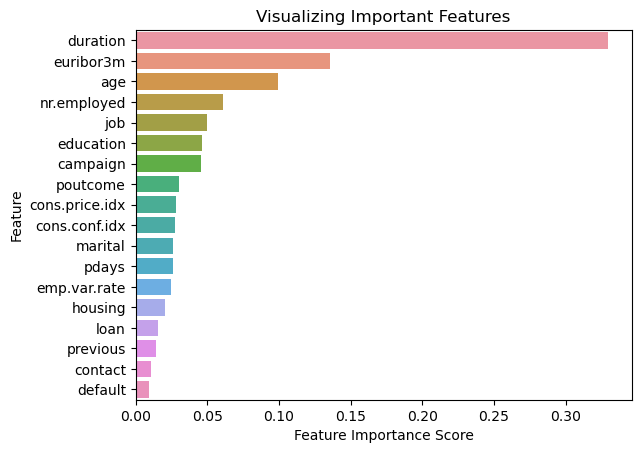

In [84]:
import seaborn as sns
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add Labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title("Visualizing Important Features")
plt.show()

Grafik diatas adalah beberapa important feature yang memungkinkan sebagai pertimbangan dalam :
- **Feature Selection**: Mencari fitur-fitur penting membantu dalam pemilihan fitur (feature selection), yang dapat meningkatkan kinerja model dan mengurangi overfitting. Ini adalah langkah penting dalam mengurangi kompleksitas model dan mempercepat pelatihan.

- **Feature Engineering**: Menemukan fitur-fitur penting dapat memandu engineer untuk membuat fitur-fitur baru yang lebih informatif dan relevan.

- **Interpretability**: Mencari fitur-fitur penting membantu dalam pemahaman model. Ini memungkinkan kita untuk menjelaskan faktor-faktor apa yang mempengaruhi hasil prediksi dan membuat model lebih interpretable.

- **Reduksi Dimensi**: Jika dataset memiliki banyak fitur dan sebagian besar tidak penting, mencari fitur-fitur penting dapat membantu dalam reduksi dimensi, yang dapat mengurangi beban komputasi dan meningkatkan efisiensi.

- **Visualisasi**: Dengan mengetahui fitur-fitur yang paling penting, kita dapat membuat visualisasi yang lebih informatif, seperti grafik fitur penting (feature importance plot).

- **Feature Understanding**: Mencari fitur-fitur penting dapat memberikan wawasan tentang aspek apa dari data yang paling mempengaruhi hasil, sehingga dapat membantu dalam pengambilan keputusan.

# Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
X = df[features].values
y = df[boolean].values
split_test_size = 0.20

In [87]:
# mengubah bentuk target y dari DataFrame atau array 2D menjadi array 1D.
y = y.ravel()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=split_test_size, random_state=100)

In [89]:
Model = GaussianNB()
Model = Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

In [90]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy:  0.8546624575036426
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.92      7321
           1       0.40      0.62      0.49       915

    accuracy                           0.85      8236
   macro avg       0.68      0.75      0.70      8236
weighted avg       0.89      0.85      0.87      8236



classification report di atas menunjukkan bahwa model memiliki presisi yang kurang baik untuk mendeteksi deposit(1), tetapi memiliki recall yang cukup baik dalam memprediksi kedua kemungkinan

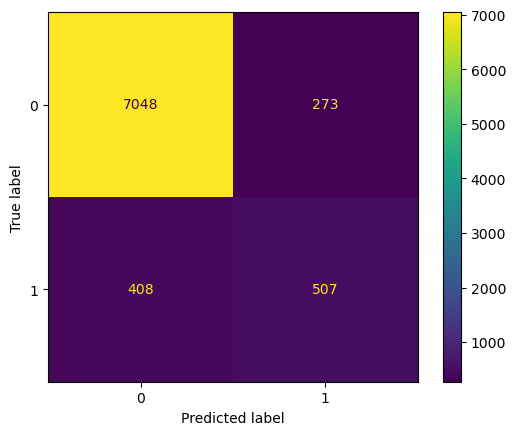

In [91]:
predictions = Dtc.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=Model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Model.classes_)
disp.plot()
plt.show()

In [92]:
cm

array([[7048,  273],
       [ 408,  507]])

Berdasarkan confusion matrix di atas, dapat disimpulkan bahwa terdapat 
- 7049 prediksi benar negatif (True Negatives)
- 507 prediksi benar positif (True Positives)
- 272 prediksi salah negatif (False Negatives)
- 408 prediksi salah positif (False Positives).


# Conclusion
1. Dari dataset diatas sebanyak deposit 4639 client melakukan deposit, dan 36537 yang tidak melakukan deposit
2. Rentang usia yang melakukan deposit terbanyak adalah 20- 48
3. Pekerjaan yang paling banyak melakukan deposit adalah admin
4. Dari semua model classification yang telah dibuat diatas, dapat kita lihat accuracy dan classification report masing-masing, untuk menemukan model yang paling bagus, maka dengan dataset yang kurang seimbang antara deposit dan tidak deposit maka diperlukan analisis lebih lanjut untuk menggunakan model-model machine learning diatas